In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# Dataset Information
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
df.describe()

Dataset Shape: (10000, 3)

Data Types:
Gender     object
Height    float64
Weight    float64
dtype: object

Basic Statistics:


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nGender Distribution:")
print(df['Gender'].value_counts())

Missing Values:
Gender    0
Height    0
Weight    0
dtype: int64

Gender Distribution:
Gender
Male      5000
Female    5000
Name: count, dtype: int64


## Data Visualization

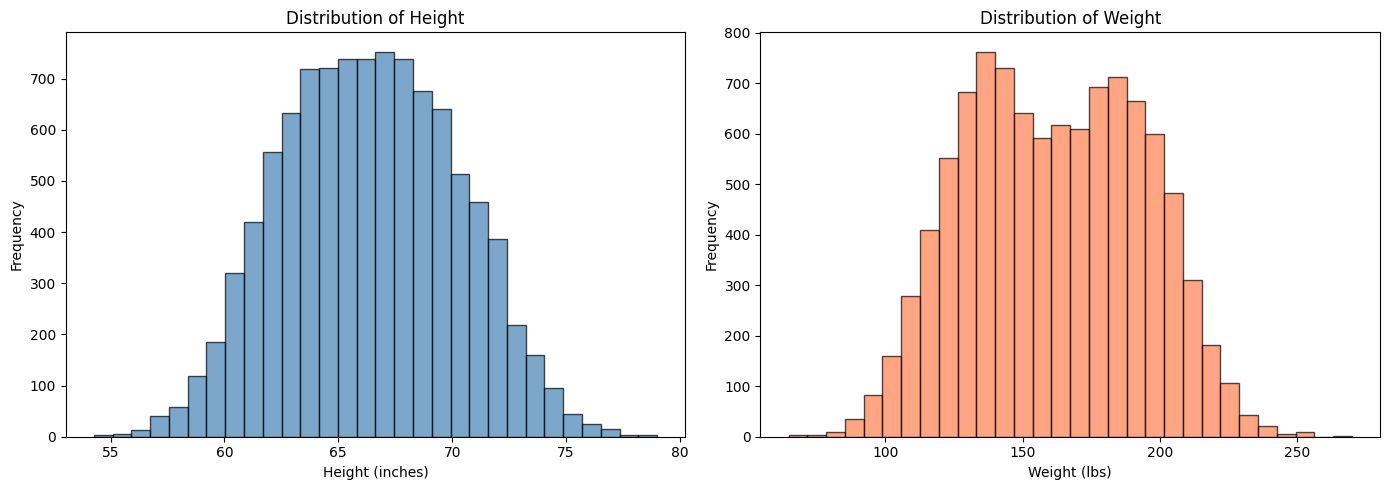

In [7]:
# Distribution of Height and Weight
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Height distribution
axes[0].hist(df['Height'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Height (inches)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Height')

# Weight distribution
axes[1].hist(df['Weight'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Weight (lbs)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Weight')

plt.tight_layout()
plt.show()

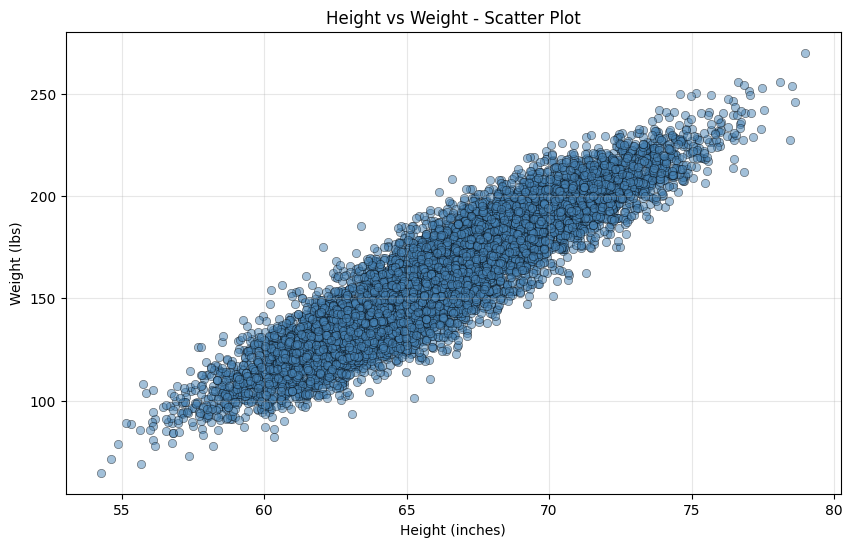

In [8]:
# Scatter plot: Height vs Weight
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], alpha=0.5, c='steelblue', edgecolor='black', linewidth=0.5)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Height vs Weight - Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()

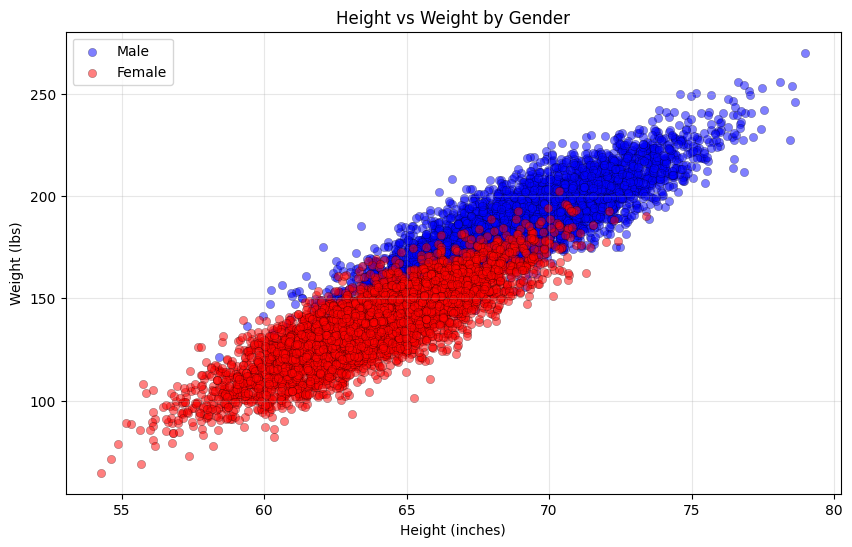

In [9]:
# Scatter plot by Gender
plt.figure(figsize=(10, 6))
colors = {'Male': 'blue', 'Female': 'red'}
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Height'], subset['Weight'], alpha=0.5, c=colors[gender], label=gender, edgecolor='black', linewidth=0.3)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Height vs Weight by Gender')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Correlation Analysis

Correlation between Height and Weight: 0.9248


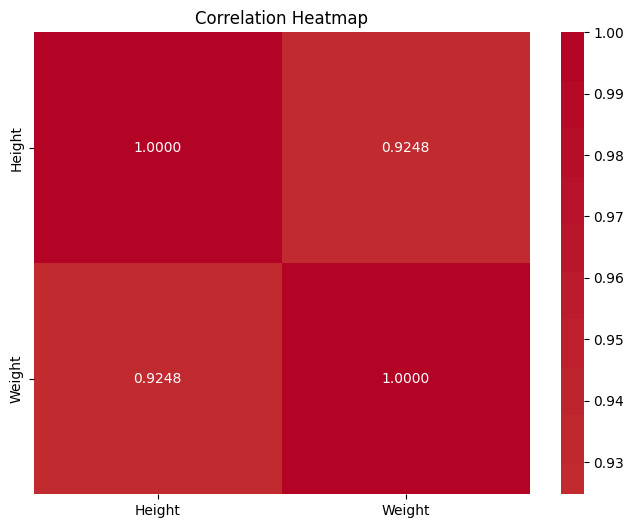

In [10]:
# Correlation between Height and Weight
correlation = df['Height'].corr(df['Weight'])
print(f"Correlation between Height and Weight: {correlation:.4f}")

# Correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
numeric_df = df[['Height', 'Weight']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.4f')
plt.title('Correlation Heatmap')
plt.show()

## Linear Regression Model

We will predict **Weight** based on **Height** using Simple Linear Regression.

In [11]:
# Import required libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df[['Height']]  # Independent variable
y = df['Weight']     # Dependent variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (10000, 1)
Target shape: (10000,)


In [12]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 8000
Testing set size: 2000


In [13]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print("Model Coefficients:")
print(f"Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"\nLinear Equation: Weight = {model.coef_[0]:.4f} * Height + ({model.intercept_:.4f})")

Model Coefficients:
Slope (Coefficient): 7.7022
Intercept: -349.7878

Linear Equation: Weight = 7.7022 * Height + (-349.7878)


In [14]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Predictions made successfully!")
print(f"Sample predictions (first 5 test samples):")
for i in range(5):
    print(f"  Height: {X_test.iloc[i, 0]:.2f} inches -> Predicted Weight: {y_test_pred[i]:.2f} lbs, Actual: {y_test.iloc[i]:.2f} lbs")

Predictions made successfully!
Sample predictions (first 5 test samples):
  Height: 68.69 inches -> Predicted Weight: 179.25 lbs, Actual: 173.12 lbs
  Height: 68.83 inches -> Predicted Weight: 180.35 lbs, Actual: 195.16 lbs
  Height: 66.40 inches -> Predicted Weight: 161.62 lbs, Actual: 170.22 lbs
  Height: 71.93 inches -> Predicted Weight: 204.23 lbs, Actual: 215.05 lbs
  Height: 67.04 inches -> Predicted Weight: 166.59 lbs, Actual: 182.72 lbs


## Model Evaluation

In [ ]:
# Model Evaluation Metrics
print("=" * 50)
print("MODEL EVALUATION METRICS")
print("=" * 50)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\n📊 Training Set Performance:")
print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"  R² Score: {train_r2:.4f}")

# Testing set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n📊 Testing Set Performance:")
print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  R² Score: {test_r2:.4f}")

In [ ]:
# Visualize the Regression Line
plt.figure(figsize=(12, 5))

# Plot 1: Regression Line on Training Data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5, c='steelblue', label='Training Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Linear Regression - Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Regression Line on Testing Data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, c='green', label='Testing Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Linear Regression - Testing Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Residual Analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residual distribution - Training
axes[0, 0].hist(residuals_train, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Residual Distribution - Training Set')

# Residual distribution - Testing
axes[0, 1].hist(residuals_test, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution - Testing Set')

# Residuals vs Predicted - Training
axes[1, 0].scatter(y_train_pred, residuals_train, alpha=0.5, c='steelblue')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Weight')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Predicted - Training Set')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Predicted - Testing
axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.5, c='green')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Weight')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Predicted - Testing Set')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Making Predictions with New Data

In [ ]:
# Function to predict weight from height
def predict_weight(height):
    """Predict weight based on height using the trained model"""
    height_df = pd.DataFrame({'Height': [height]})
    predicted_weight = model.predict(height_df)[0]
    return predicted_weight

# Example predictions
print("Weight Predictions for Different Heights:")
print("-" * 40)
heights_to_predict = [60, 65, 70, 75, 80]
for height in heights_to_predict:
    weight = predict_weight(height)
    print(f"Height: {height} inches -> Predicted Weight: {weight:.2f} lbs")

## Conclusion

### Key Findings:
1. **Strong Correlation**: Height and Weight show a strong positive correlation
2. **Model Performance**: The Linear Regression model achieves good R² scores on both training and testing sets
3. **Residual Analysis**: Residuals are approximately normally distributed around zero, validating the linear regression assumptions
4. **Practical Application**: The model can effectively predict weight based on height measurements

### Model Equation:
$$\text{Weight} = \text{Slope} \times \text{Height} + \text{Intercept}$$

This simple linear regression demonstrates the fundamental relationship between height and weight in human beings.